In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import signal
import pickle

In [2]:

def rossler(t, xyz, a, b, c, N, k, Iext,d):
    x = np.array(xyz[0:100])
    y = np.array(xyz[100:200])
    z = np.array(xyz[200:300])
    x_mean = np.mean(x)
    np.shape(x_mean)
    dxdt = -y - z + k * (d - x_mean) + Iext
    dydt = x + a * y
    dzdt = b + z * (x - c)
    diff = []
    diff.extend(dxdt)
    diff.extend(dydt)
    diff.extend(dzdt)
    return np.array(diff).flatten()


a = 0.2
b = 0.2
c = 5.7
N = 100
Iext=0
d=8
np.random.seed(7)
x_intial = np.random.rand(N)
y_initial = np.random.rand(N)
z_initial = np.random.rand(N)
initial_vals = []
initial_vals.extend(x_intial)
initial_vals.extend(y_initial)
initial_vals.extend(z_initial)

k= 0.001 #0.001

t_span = (0, 1000) #start to end
t_eval = np.linspace(*t_span, 500000) #dt=0.001 or 1000 samples/sec


sol = solve_ivp(rossler, t_span, initial_vals, args=(a, b, c,N,k,Iext,d), t_eval=t_eval,vectorized=True,method='LSODA')


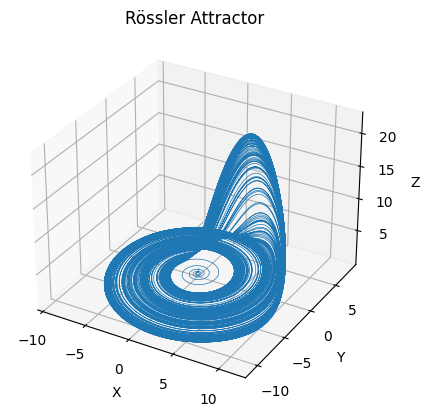

In [3]:
x_solved = np.array(sol.y)[0,:] #(1st in array,10000 values)
y_solved = np.array(sol.y[100,:]) #(101st in array,10000 values)
z_solved = np.array(sol.y[200,:]) #(201st in array,10000 values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_solved, y_solved, z_solved, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rössler Attractor')
plt.show()

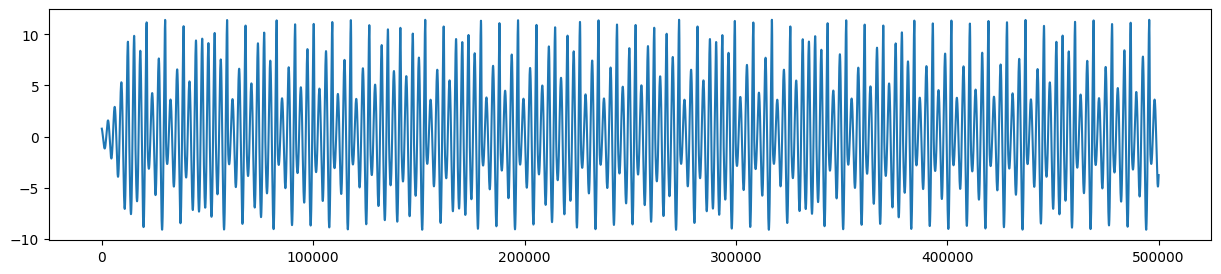

In [4]:
x_vals = np.array(sol.y)[0:100,:]
x_solved = np.array(sol.y)[1,:]
plt.figure(figsize = (15,3))
plt.plot(x_solved)


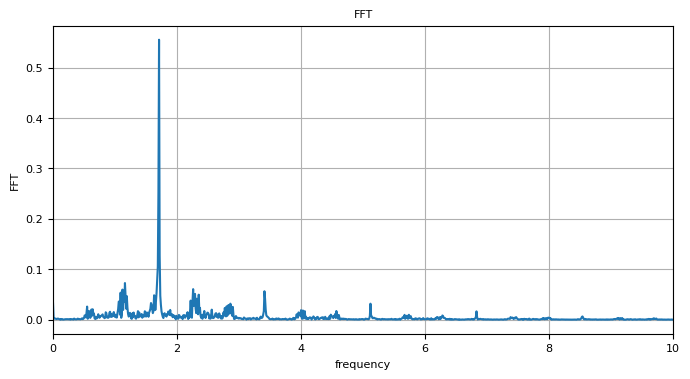

In [5]:
sampling_rate = 5000
fft_output = np.fft.fft(x_vals[0])
N_fft = len(fft_output)
#print(N_fft)
n = np.arange(N_fft)
T = N_fft/sampling_rate
freq = n/T
#print(fft_output)

plt.figure(figsize = (8,4))
plt.plot(freq, (np.abs(fft_output)/np.linalg.norm(np.abs(fft_output))))
plt.xlim(0,10)
#plt.ylim(0,1)
plt.title('FFT',fontsize="8")
plt.xlabel('frequency',fontsize="8")
plt.ylabel('FFT',fontsize="8")
plt.xticks(fontsize="8")
plt.yticks(fontsize = '8')
plt.grid()

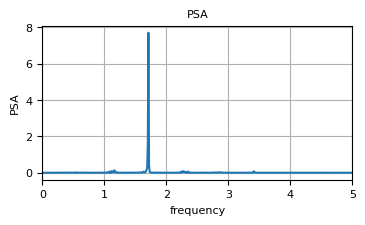

In [6]:
#Power Spectral Analysis
psa=np.square(np.abs(fft_output))/(N_fft*N_fft)
plt.figure(figsize = (4,2))
plt.plot(freq,psa)
plt.xlim(0,5)
plt.title('PSA',fontsize="8")
plt.xlabel('frequency',fontsize="8")
plt.ylabel('PSA',fontsize="8")
plt.xticks(fontsize="8")
plt.yticks(fontsize = '8')
plt.grid()

BIFURCATION

In [7]:
def rossler(t, xyz,a, b, c, N, k, d):
    
    x = np.array(xyz[0:100])
    y = np.array(xyz[100:200])
    z = np.array(xyz[200:300])
    x_mean = np.mean(x)
    dxdt = -y - z + k * (d - x_mean) 
    dydt = x + a * y
    dzdt = b + z * (x - c)
    diff = []
    diff.extend(dxdt)
    diff.extend(dydt)
    diff.extend(dzdt)
    return np.array(diff).flatten()

In [ ]:
a_values = np.arange(0,0.5,0.001)
b = 0.2
c= 5.7
d= 8
k=0.001 #k_values = np.arange(0,0.4,0.001) 
t_span = (0, 100)
t_eval = np.linspace(*t_span, 100000)
N = 100

x_intial = np.random.rand(100)#initial_vals[0 + i]
y_initial = np.random.rand(100)#initial_vals[100 + i]
z_initial = np.random.rand(100)#initial_vals[200 + i]

initial_vals = []
initial_vals.extend(x_intial)
initial_vals.extend(y_initial)
initial_vals.extend(z_initial)

bifurcation_data = {}

for a in a_values: 
    sol = solve_ivp(rossler, t_span, initial_vals, args=(a, b, c, N, k, d), t_eval=t_eval, method='LSODA')
    x_data = np.array(sol.y)[0,:] #taking x values of first rossler
    x_peaks_timepoints, _ = signal.find_peaks(x_data[100000:]) #removing transient
    x_peak_vals = x_data[x_peaks_timepoints]
    bifurcation_data[a] = x_peak_vals
    x_ax = a * np.ones(x_peak_vals.shape[0])
    plt.plot(x_ax,x_peak_vals,'.', color = 'black', markersize = 1)

plt.xlabel('A', fontsize = 9)
plt.ylabel('x_max', fontsize = 9)
plt.title('Bifurcation diagram', fontsize = 10)
plt.show()


In [ ]:
# for a in a_values:
#     x_ax = a * np.ones(bifurcation_data[k].shape[0])
#     plt.plot(x_ax,bifurcation_data[k],'.', color = 'black', markersize = 1)

# plt.xlabel('k values',fontsize = 9)
# plt.ylabel('x max',fontsize = 9)
# plt.title('Bifurcation diagram',fontsize = 10)
# plt.show()

In [ ]:
data = bifurcation_data
file_1 = open('bifurcation_vals_run_k_12_04.pkl', 'wb')
    
pickle.dump(data, file_1)
file_1.close()

In [8]:
import pickle
with open('bifurcation_vals_run_a12_04.pkl', 'rb') as file:
    bifurcation_data = pickle.load(file)

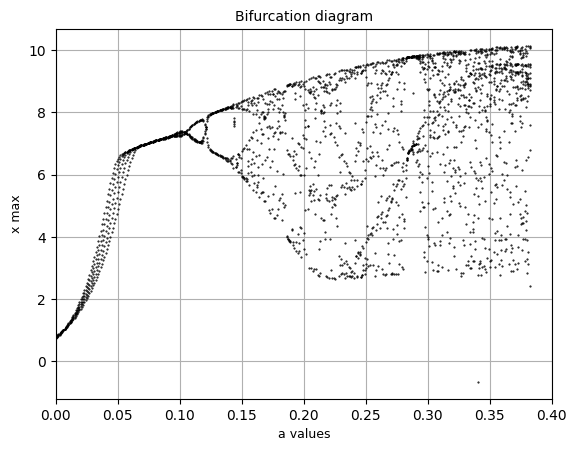

In [9]:
import numpy as np
from matplotlib import pyplot as plt
#a_values = #np.arange(-0.1,0.35,0.001)

for a in bifurcation_data.keys():
    x_ax = a * np.ones(bifurcation_data[a].shape[0])
    plt.plot(x_ax[11:],bifurcation_data[a][11:],'.', color = 'black', markersize = 1)
plt.grid()
plt.xlabel('a values',fontsize = 9)
plt.ylabel('x max',fontsize = 9)
plt.title('Bifurcation diagram',fontsize = 10)
plt.xlim(0,0.4)
plt.show()

In [ ]:
def rossler(t, xyz, a, b, c, N, k, Iext,d):
    x = np.array(xyz[0:100])
    y = np.array(xyz[100:200])
    z = np.array(xyz[200:300])
    x_mean = np.mean(x)
    np.shape(x_mean)
    dxdt = -y - z + k * (d - x_mean) + Iext
    dydt = x + a * y
    dzdt = b + z * (x - c)
    diff = []
    diff.extend(dxdt)
    diff.extend(dydt)
    diff.extend(dzdt)
    return np.array(diff).flatten()

a = 0.135
b = 0.2
c= 5.7
d= 8
k=0.001
t_span = (0, 100)
t_eval = np.linspace(*t_span, 100000)
N = 100

t_span = (0, 1000) #start to end
t_eval = np.linspace(*t_span, 500000) #dt=0.001 or 1000 samples/sec

sol = solve_ivp(rossler, t_span, initial_vals, args=(a, b, c,N,k,Iext,d), t_eval=t_eval,vectorized=True,method='LSODA')
x_solved = np.array(sol.y)[0,2000:] #(1st in array,10000 values)
y_solved = np.array(sol.y[100,2000:]) #(101st in array,10000 values)
z_solved = np.array(sol.y[200,2000:]) #(201st in array,10000 values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_solved, y_solved, z_solved, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rössler Attractor for a =' + ' ' +str(a))
plt.show()



In [ ]:
x_vals = np.array(sol.y)[0:100,:]
x_solved = np.array(sol.y)[1,0:]
plt.figure(figsize = (15,3))
plt.xlim(0,500000)
plt.plot(x_solved)

In [ ]:
def shannon_entropy(probabilities):
    non_zero_probabilities = probabilities[probabilities != 0]
    entropy = -np.sum(non_zero_probabilities * np.log2(non_zero_probabilities))
    return entropy

probabilities = np.array([0.2, 0.9, 0.1, 0.4, 0])
entropy = shannon_entropy(probabilities)

print(entropy)


In [ ]:
z_vals = sol.y[200:300,:]
y_vals=sol.y[100:200,:]
b=np.corrcoef((x_vals))

plt.imshow(np.abs(b))
plt.colorbar()

In [ ]:
def rossler(t, xyz, a, b, c, Q, N, k, Iext):
    x = xyz[0:100]
    y = xyz[100:200]
    z = xyz[200:300]
    x_mean = np.mean(x)
    dxdt = -y - z + k * (Q* x_mean - x) + Iext
    dydt = x + a * y
    dzdt = b + z * (x - c)
    diff = []
    diff.extend(dxdt)
    diff.extend(dydt)
    diff.extend(dzdt)
    return np.array(diff).flatten()


a = 0.2
b = 0.2
c = 5.7
N = 100
Iext=0
np.random.seed(7)
x_intial = np.random.rand(N)
y_initial = np.random.rand(N)
z_initial = np.random.rand(N)
initial_vals = []
initial_vals.extend(x_intial)
initial_vals.extend(y_initial)
initial_vals.extend(z_initial)

Q=0.2
k=0.05

t_span = (0, 1000) #start to end
t_eval = np.linspace(*t_span, 100000) #dt=0.001 or 1000 samples/sec


sol = solve_ivp(rossler, t_span, initial_vals, args=(a, b, c,Q,N,k,Iext), t_eval=t_eval,vectorized=True)
f=np.corrcoef((sol.y[0:100,:]))
plt.imshow(np.abs(f))
plt.colorbar()